# Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
books=pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False,encoding="latin-1")
#error_bad_lines=False -> bad lines removed from csv files having many comma separated lines
books.columns=['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.

In [4]:
users=pd.read_csv('BX-Users.csv',sep=";",error_bad_lines=False,encoding="latin-1")
users.columns = ['User-ID', 'Location', 'Age']

In [5]:
ratings=pd.read_csv('BX-Book-Ratings.csv',sep=";",error_bad_lines=False,encoding="latin-1")
ratings.columns = ['User-ID', 'ISBN', 'Book-Rating']

In [6]:
print(books.shape)   # 8 columns & 271360 records
print(users.shape)   # 3 columns  & 278858 records
print(ratings.shape) # 3 columns

(271360, 8)
(278858, 3)
(1149780, 3)


In [7]:
n_users = ratings['User-ID'].nunique()
n_items = ratings['ISBN'].nunique()

print('No. of Users: '+ str(n_users))
print('No. of Books: '+str(n_items))

No. of Users: 105283
No. of Books: 340556


In [8]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1,inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [10]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Data Visualization

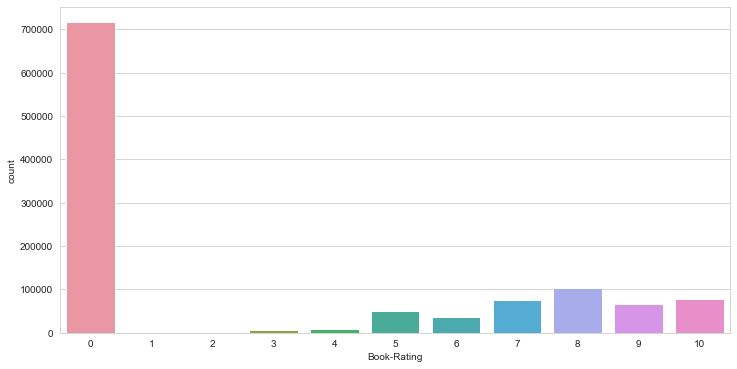

In [12]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='Book-Rating',data=ratings)
#Graph of Count of no of Ratings from 0-10

Text(0, 0.5, 'Count')

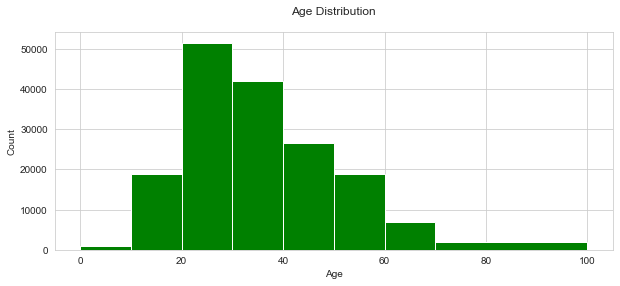

In [13]:
plt.figure(figsize=(10,4))
users['Age'].hist(bins=[0, 10, 20, 30, 40, 50,60,70,100],color='green')
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
#Graph of Age distribution of users rating Books

**NOTE :** bookrating dataframe is combination of books and rating dataframe based off of ISBN number of book 

In [14]:
bookrating = pd.merge(books,ratings,on='ISBN')
bookrating.head()   # combined books and ratings df based off of ISBN of book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


In [15]:
rating_count=pd.DataFrame(bookrating.groupby('Book-Title')['Book-Rating'].mean())
rating_count.sort_values(by='Book-Rating',ascending=False).head()
#rating_count is a dataframe which has avg rating of each book

,Book-Rating
Book-Title,
Film Is: The International Free Cinema,10.0
"More Secrets of Happy Children: Embrace Your Power as a Parent--and Help Your Children be Confident, Positive, Well-Adjusted and Happy",10.0
Jo's Boys : From the Original Publisher,10.0
The Vanished Priestess : An Annie Szabo Mystery,10.0
Game and Hunting,10.0


In [16]:
rating_count['No of Ratings'] = pd.DataFrame(bookrating.groupby('Book-Title')['Book-Rating'].count())
rating_count.head()
#Adding No of Ratings Col for Each book

,Book-Rating,No of Ratings
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.25,4
Always Have Popsicles,0.00,1
Apple Magic (The Collector's series),0.00,1
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.00,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.00,1


In [17]:
rating_count.sort_values(by='No of Ratings',ascending=False).head()
#getting sorted values

,Book-Rating,No of Ratings
Book-Title,,
Wild Animus,1.019584,2502
The Lovely Bones: A Novel,4.468726,1295
The Da Vinci Code,4.642539,898
A Painted House,3.231504,838
The Nanny Diaries: A Novel,3.530193,828


<Figure size 864x648 with 0 Axes>

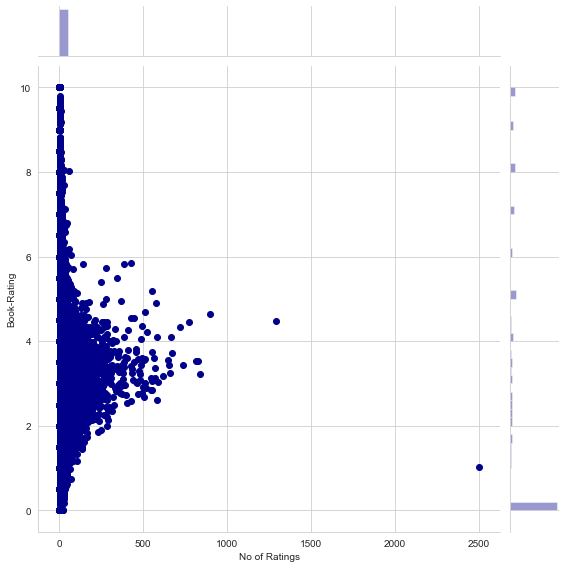

In [18]:
plt.figure(figsize=(12,9))
sns.jointplot(x='No of Ratings',y='Book-Rating',data=rating_count,height=8,color='darkblue',ratio=8)

# Simple Popularity based Recommendation System

**Note:** counts is dataframe consisting of bookrating dataframe with a new column 'Book-rating Sum' containing sum of ratings of each book based off of ISBN no.
top_10_books is a dataframe which shows the top 10 books whose 'Book-rating Sum' is maximum.

In [19]:
counts=pd.DataFrame(bookrating.groupby('ISBN')['Book-Rating'].sum())
counts['Book-Rating Sum']=counts['Book-Rating'] #renaming column Book-rating 
counts.drop('Book-Rating',axis=1,inplace=True)# deleting old column
print('Most Popular Books are:\n')
top_10_books=counts.sort_values(by='Book-Rating Sum',ascending=False).head(10)  #sorting by Book Rating Sum 
top_10_books.merge(books,left_index=True,right_on='ISBN')# displaying top 10 popular books

Most Popular Books are:



,Book-Rating Sum,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
408,5787,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,4108,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,3134,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2798,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
356,2595,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2551,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2524,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2402,0446672211,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
231,2219,0452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books
118,2179,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


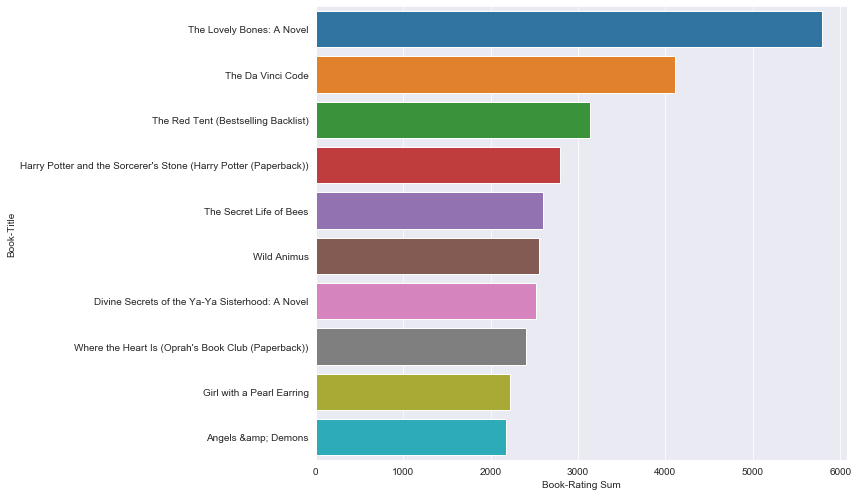

In [20]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
sns.barplot(x='Book-Rating Sum',y='Book-Title',data=top_10_books.merge(books,left_index=True,right_on='ISBN'))
plt.tight_layout()

# Recommending Similar Books using Correlation

In [21]:
bookrating.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


In [22]:
bookrating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 7 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031136 non-null  object
 1   Book-Title           1031136 non-null  object
 2   Book-Author          1031135 non-null  object
 3   Year-Of-Publication  1031136 non-null  object
 4   Publisher            1031134 non-null  object
 5   User-ID              1031136 non-null  int64 
 6   Book-Rating          1031136 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 62.9+ MB


**NOTE:** Reducing the dataset size,I have created another dataframe bookrating_users which contains users who have rated atleast 100 books and Books which have atleast 100 no of ratings.

In [23]:
count_id=bookrating['User-ID'].value_counts()  #returns count of occurence of each user ID...thus we get count of users
count_rate=bookrating['Book-Title'].value_counts()
bookrating_users=bookrating[bookrating['User-ID'].isin(count_id[count_id>=100].index)]  #count>100
bookrating_users=bookrating_users[bookrating_users['Book-Title'].isin(count_rate[count_rate>=100].index)]
#considering users who have rated atleast (min) 100 books and books which have at least 100 ratings.

In [24]:
bookrating_users.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9
32,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,29526,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,113270,0


In [25]:
bookrating_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88217 entries, 31 to 1030982
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 88217 non-null  object
 1   Book-Title           88217 non-null  object
 2   Book-Author          88217 non-null  object
 3   Year-Of-Publication  88217 non-null  object
 4   Publisher            88217 non-null  object
 5   User-ID              88217 non-null  int64 
 6   Book-Rating          88217 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.4+ MB


In [26]:
bookrating_users.sort_values(by='User-ID',ascending=False)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
47471,0451155750,The Dead Zone,Stephen King,2004,Signet Book,278418,0
161839,0515131229,Dance upon the Air (Three Sisters Island Trilogy),Nora Roberts,2003,Jove Books,278418,8
496427,0670805149,Lake Wobegon Days,Garrison Keillor,1985,Penguin USA,278418,0
412830,0446609617,Standoff,Sandra Brown,2001,Warner Vision,278418,0
213508,0399137734,Dragon Tears,Dean R. Koontz,1993,Putnam Pub Group,278418,0
...,...,...,...,...,...,...,...
174043,014028009X,Bridget Jones's Diary,Helen Fielding,1999,Penguin Books,254,0
18912,0375823352,"The Amber Spyglass (His Dark Materials, Book 3)",PHILIP PULLMAN,2002,Knopf Books for Young Readers,254,0
64300,0441003257,Good Omens,Neil Gaiman,1996,Ace Books,254,0
108893,0446605239,The Notebook,Nicholas Sparks,1998,Warner Books,254,0


In [27]:
print(count_id[count_id>=100].index)  #User-ID who have rated >100 books
print('\n')
print(count_rate[count_rate>=100].index)  #Book Titles unique value >100

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            123597,  13935, 100782, 246507, 143909, 236955,  26443, 160735,
             28619,  39345],
           dtype='int64', length=1659)


Index(['Wild Animus', 'The Lovely Bones: A Novel', 'The Da Vinci Code',
       'A Painted House', 'The Nanny Diaries: A Novel',
       'Bridget Jones's Diary', 'The Secret Life of Bees',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'The Red Tent (Bestselling Backlist)', 'Angels &amp; Demons',
       ...
       'The Vendetta Defense', 'Summer Light', 'Lake Wobegon days',
       'Silent Night : A Christmas Suspense Story', 'Kitchen',
       'The Cobra Event', 'Tell Me Lies (Tell Me Lies)',
       'Island of the Blue Dolphins', 'Their Eyes Were Watching God: A Novel',
       'Shopgirl : A Novella'],
      dtype='object', length=914)


In [28]:
bookrating_users['Book-Title'].nunique()

914

In [29]:
bookrating_users['User-ID'].nunique()

1640

In [30]:
book_matrix=bookrating_users.pivot_table(index='User-ID',values='Book-Rating',columns='Book-Title')

In [31]:
print(book_matrix.shape)
book_matrix.head()

#1640 -> User ID
#914 -> Books    hence mathces above result

(1640, 914)


Book-Title,1984,1st to Die: A Novel,24 Hours,2nd Chance,4 Blondes,84 Charing Cross Road,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",...,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Women Who Run with the Wolves,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
507,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
1435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
rating_count[(rating_count['Book-Rating']>=4) & (rating_count['No of Ratings']>800)]
#getting the best book with respect to rating and No of ratings

,Book-Rating,No of Ratings
Book-Title,,
The Da Vinci Code,4.642539,898
The Lovely Bones: A Novel,4.468726,1295


In [33]:
lovelybones_user_ratings = book_matrix['The Lovely Bones: A Novel'] 
#taking into account book_matrix which is on reduced no of users
davinci_user_ratings = book_matrix['The Da Vinci Code']
lovelybones_user_ratings.head()

User-ID
254    NaN
507    NaN
882    NaN
1424   NaN
1435   NaN
Name: The Lovely Bones: A Novel, dtype: float64

In [34]:
similar_to_lovelybones = book_matrix.corrwith(lovelybones_user_ratings)
similar_to_davinci = book_matrix.corrwith(davinci_user_ratings)

In [35]:
corr_lovelybones = pd.DataFrame(similar_to_lovelybones,columns=['Correlation'])
corr_lovelybones.dropna(inplace=True)
corr_lovelybones.head()

,Correlation
Book-Title,
1984,-0.019584
1st to Die: A Novel,0.277049
24 Hours,0.094140
2nd Chance,0.249809
4 Blondes,0.027812


In [36]:
#Sorting to get best Correlated Book to lovelybones
print('Recommended books just like The Lovely Bones:')
corr_lovelybones.sort_values('Correlation',ascending=False).head()

Recommended books just like The Lovely Bones:


,Correlation
Book-Title,
The Lovely Bones: A Novel,1.000000
Cryptonomicon,0.716309
The Jury,0.683793
Vector,0.616469
Mortal Prey,0.593020


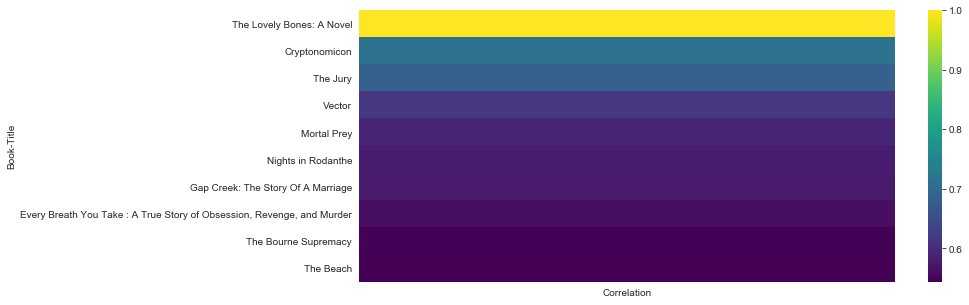

In [37]:

plt.figure(figsize=(12,5))
sns.heatmap(corr_lovelybones.sort_values('Correlation',ascending=False).head(10),cmap='viridis')

In [38]:
corr_lovelybones = corr_lovelybones.join(rating_count['No of Ratings'])
corr_lovelybones.head()

,Correlation,No of Ratings
Book-Title,,
1984,-0.019584,284
1st to Die: A Novel,0.277049,509
24 Hours,0.094140,106
2nd Chance,0.249809,356
4 Blondes,0.027812,151


In [39]:
correlation_lb=corr_lovelybones[corr_lovelybones['No of Ratings']>100].sort_values('Correlation',ascending=False).head()
correlation_lb

,Correlation,No of Ratings
Book-Title,,
The Lovely Bones: A Novel,1.000000,1295
Cryptonomicon,0.716309,134
The Jury,0.683793,118
Vector,0.616469,141
Mortal Prey,0.593020,165


***Best book based on popular book with good rating is Cryptonomicon***

# Collaborative Filtering Using KNN

In [40]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [41]:
book_matrix_new=bookrating_users.pivot_table(index='Book-Title',values='Book-Rating',columns='User-ID')
book_matrix_new.head()

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
book_matrix_new=book_matrix_new.fillna(0)
book_matrix_matrix= csr_matrix(book_matrix_new.values)  #csr is compressed sparse matrix since there are lots of NAn-->0

In [43]:
book_matrix_new.head()

User-ID,254,507,882,1424,1435,1733,1903,2033,2110,2276,...,275020,275970,276463,276680,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
book_matrix_matrix  #this sparse matrix created only for fitting into the model

<914x1640 sparse matrix of type '<class 'numpy.float64'>'
	with 24264 stored elements in Compressed Sparse Row format>

In [45]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')  # metric used for evaluation is cosine
model_knn.fit(book_matrix_matrix)  #fitting model with matrix

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [60]:
random_index = np.random.choice(book_matrix_new.shape[0])  #generating random book indices out of the book_matrix
print("Random chosen index is:",random_index)
distances, indices = model_knn.kneighbors(book_matrix_new.iloc[random_index,:].values.reshape(1, -1), n_neighbors = 6)
#applying kneighbours to fitted model

Random chosen index is: 430


In [61]:
book_matrix_new.index[random_index]

'No Greater Love'

In [62]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(book_matrix_new.index[random_index]))  #printing our random indexed Title of Book
    else:
        print('{0}) {1} --- having distance of {2}:'.format(i, book_matrix_new.index[indices.flatten()[i]], distances.flatten()[i]))
        #using .format

Recommendations for No Greater Love:

1) Heartbeat --- having distance of 0.5966235528809226:
2) Five Days in Paris --- having distance of 0.6421432611289605:
3) Zoya --- having distance of 0.6923563466308695:
4) The Long Road Home --- having distance of 0.6968244819391127:
5) Daddy --- having distance of 0.6998243036826199:
